## <span style=font-family:Times New Roman>DMML_Assignment2 - Clustering</span>
### <span style=font-family:Times New Roman>Aniket Santra - MDS202106</span>

In [6]:
import numpy as np
import pandas as pd
import time

# <span style=font-family:Times New Roman>NIPS Dataset</span>

In [7]:
start=time.time()

In [8]:
nips=pd.read_csv('docword.nips.txt',skiprows=3,sep=' ',header=None)

In [9]:
nips

,0,1,2
0,1,2,1
1,1,39,1
2,1,42,3
3,1,77,1
4,1,95,1
...,...,...,...
746311,1500,12382,1
746312,1500,12388,3
746313,1500,12390,1
746314,1500,12393,1


In [10]:
len(nips[0].unique())

1500

In [11]:
nips.groupby([0]).count()

,1,2
0,,
1,532,532
2,550,550
3,560,560
4,757,757
5,578,578
...,...,...
1496,574,574
1497,585,585
1498,497,497


## <span style=font-family:Times New Roman>Creating Sparse Matrix</span>

In [12]:
m=np.zeros((max(list(nips[1]))+1,len(set(nips[0]))+1))
for j in range(len(nips[1])):
    m[int(nips[1][j]),int(nips[0][j])]=1
sparse_matrix=pd.DataFrame(m)
sparse_matrix=sparse_matrix.iloc[1:,1:]
sparse_matrix

,1,2,3,4,5,6,7,8,9,10,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <span style=font-family:Times New Roman>Creating Jaccard Matrix </span>

In [13]:
from sklearn.metrics import pairwise_distances
num = sparse_matrix.to_numpy()
num = np.transpose(num)
jaccard = 1-pairwise_distances(num, metric = 'jaccard')

C:\Users\anike\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [14]:
jaccard = pd.DataFrame(jaccard)

## <span style=font-family:Times New Roman>Fitting K-means Model To The Data</span>

In [15]:
from sklearn.cluster import KMeans
l=[]
%reload_ext memory_profiler
for i in range(1,10):
    model=KMeans(n_clusters = i,init = 'k-means++',max_iter = 50,n_init = 10)
    %memit model.fit(jaccard)
    l.append(model.inertia_)

C:\Users\anike\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


peak memory: 366.21 MiB, increment: 20.22 MiB
peak memory: 366.94 MiB, increment: 17.89 MiB
peak memory: 367.19 MiB, increment: 17.39 MiB
peak memory: 367.30 MiB, increment: 17.29 MiB
peak memory: 367.41 MiB, increment: 17.27 MiB
peak memory: 367.59 MiB, increment: 17.32 MiB
peak memory: 367.71 MiB, increment: 17.29 MiB
peak memory: 367.86 MiB, increment: 17.32 MiB
peak memory: 367.99 MiB, increment: 17.30 MiB


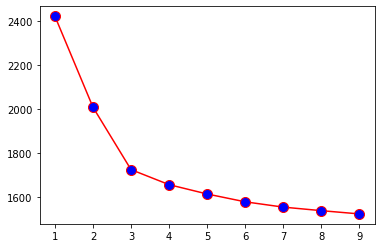

In [16]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,10)),l, c='r', marker='o' , markerfacecolor='blue' , markersize=10)

## <span style=font-family:Times New Roman>Final Model</span>

In [17]:
%reload_ext memory_profiler
model1=KMeans(n_clusters=3,init='k-means++',max_iter=50,n_init=10,random_state=42)
%memit model1.fit(jaccard)
model1.inertia_
y_pred=model1.predict(jaccard)

peak memory: 388.82 MiB, increment: 17.30 MiB


In [18]:
y_pred

array([0, 0, 0, ..., 0, 0, 2])

In [19]:
output={}
for i in np.unique(y_pred):
    output[i]=[]
    for j in range(len(y_pred)):
        if y_pred[j]==i:
            output[i].append(j+1)
print(output)
print("\n")
for i in np.unique(y_pred):
    print(i,":",len(output[i]))

{0: [1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 30, 33, 35, 36, 39, 53, 54, 55, 56, 62, 63, 75, 76, 77, 80, 84, 91, 106, 107, 108, 109, 111, 112, 114, 116, 118, 119, 124, 125, 127, 129, 131, 132, 133, 134, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 159, 160, 161, 162, 165, 166, 168, 175, 176, 192, 196, 197, 199, 200, 201, 202, 203, 204, 207, 208, 210, 214, 217, 218, 221, 229, 233, 234, 237, 240, 244, 245, 246, 247, 248, 254, 255, 256, 257, 258, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 275, 276, 278, 280, 281, 282, 284, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 299, 300, 309, 320, 321, 322, 323, 324, 333, 334, 336, 338, 339, 340, 341, 342, 343, 346, 347, 349, 350, 351, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 377, 378, 379, 380, 382, 383, 391, 392, 397, 398, 399, 400, 401, 402, 403, 404, 405, 407, 408, 409

In [20]:
from sklearn.decomposition import PCA
Matrix_PCA=PCA(n_components=2)
new=Matrix_PCA.fit_transform(jaccard)
x,y=new[:,0],new[:,1]
cluster_color={0:"#FF4040",1:"#7FFF00",2:"#0A0A0A"}
cluster_names={0:'cluster1',1:'cluster2',2:'cluster3'}
cluster=model1.labels_.tolist()

## <span style=font-family:Times New Roman>Plotting The Clusters</span>

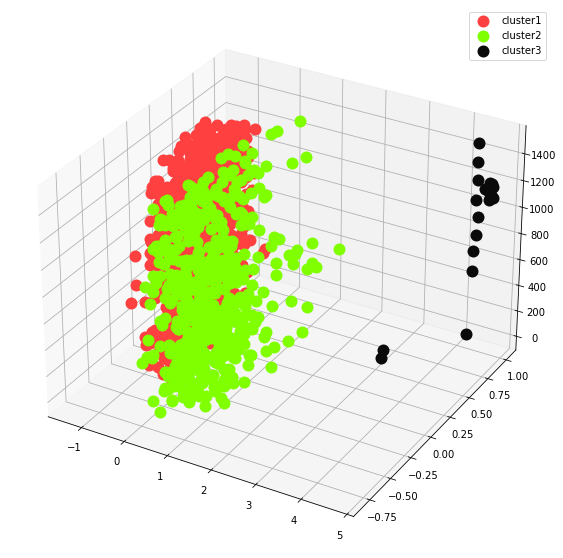

In [21]:
M=pd.DataFrame(dict(x=x,y=y,z=jaccard.columns,label=cluster))
L=M.groupby('label')
plt.figure("NIPS",figsize=(20,10))
axis=plt.axes(projection='3d')
axis.margins(0.05)
for name, group in L:
    
    axis.plot(group.x,group.y,group.z, marker='o',linestyle="",ms=12,
                 label=cluster_names[name],color=cluster_color[name],mec='none')
    axis.set_aspect('auto')
    axis.tick_params(\
                     axis='x',
                     which='both',
                     bottom='off',
                     top='off',
                     labelbottom='off')
    axis.tick_params(\
                      axis='y',
                      which='both',
                      bottom='off',
                      top='off',
                      labelbottom='off')
axis.legend(numpoints=1) 

In [22]:
end=time.time()
end-start

48.040303230285645

# <span style=font-family:Times New Roman>KOS Dataset</span>

In [23]:
start=time.time()

In [24]:
kos=pd.read_csv('docword.kos.txt',skiprows=3,sep=' ',header=None)

In [25]:
kos

,0,1,2
0,1,61,2
1,1,76,1
2,1,89,1
3,1,211,1
4,1,296,1
...,...,...,...
353155,3430,6328,1
353156,3430,6644,1
353157,3430,6741,1
353158,3430,6799,1


## <span style=font-family:Times New Roman>Creating Sparse Matrix</span>

In [26]:
m=np.zeros((len(set(kos[1]))+1,len(set(kos[0]))+1))
for j in range(len(kos[1])):
    m[int(kos[1][j]),int(kos[0][j])]=1
sparse_matrix=pd.DataFrame(m)
sparse_matrix=sparse_matrix.iloc[1:,1:]
sparse_matrix

,1,2,3,4,5,6,7,8,9,10,...,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6905,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <span style=font-family:Times New Roman>Creating Jaccard Matrix </span>

In [27]:
from sklearn.metrics import pairwise_distances
num=sparse_matrix.to_numpy()
num=np.transpose(num)
jaccard=1-pairwise_distances(num, metric='jaccard')

C:\Users\anike\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [28]:
pd.DataFrame(jaccard)

,0,1,2,3,4,5,6,7,8,9,...,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429
0,1.000000,0.066667,0.035398,0.042781,0.080717,0.039062,0.061350,0.037037,0.222222,0.029851,...,0.038043,0.045455,0.043478,0.028369,0.046667,0.072993,0.076271,0.042169,0.019108,0.029586
1,0.066667,1.000000,0.062857,0.027972,0.048913,0.049383,0.068376,0.033708,0.054054,0.084337,...,0.051471,0.031674,0.073171,0.077778,0.058252,0.064516,0.067568,0.033058,0.027523,0.024390
2,0.035398,0.062857,1.000000,0.032710,0.051181,0.039216,0.047368,0.050633,0.043716,0.025000,...,0.038278,0.696629,0.043210,0.036364,0.033898,0.054878,0.033784,0.031088,0.033333,0.025641
3,0.042781,0.027972,0.032710,1.000000,0.157360,0.016949,0.032258,0.024194,0.013333,0.024590,...,0.034884,0.035433,0.023973,0.031250,0.028571,0.030769,0.017857,0.032258,0.027972,0.032051
4,0.080717,0.048913,0.051181,0.157360,1.000000,0.031056,0.072917,0.061350,0.076087,0.023952,...,0.041860,0.065517,0.061538,0.022989,0.049724,0.052632,0.052632,0.051020,0.043243,0.056122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0.072993,0.064516,0.054878,0.030769,0.052632,0.090909,0.098039,0.097222,0.130435,0.040541,...,0.023622,0.053922,0.032922,0.090909,0.142857,1.000000,0.346939,0.066667,0.076087,0.066038
3426,0.076271,0.067568,0.033784,0.017857,0.052632,0.106383,0.108434,0.092593,0.105263,0.036364,...,0.028037,0.031746,0.031250,0.066667,0.101449,0.346939,1.000000,0.121951,0.053333,0.056818
3427,0.042169,0.033058,0.031088,0.032258,0.051020,0.031579,0.045455,0.029412,0.031746,0.009804,...,0.026316,0.029915,0.037453,0.047619,0.060870,0.066667,0.121951,1.000000,0.262626,0.029630
3428,0.019108,0.027523,0.033333,0.027972,0.043243,0.062500,0.024590,0.045455,0.035398,0.022727,...,0.036232,0.036364,0.023256,0.043011,0.048077,0.076087,0.053333,0.262626,1.000000,0.285714


## <span style=font-family:Times New Roman>Fitting K-means Model To The Data</span>

In [29]:
%reload_ext memory_profiler
from sklearn.cluster import KMeans
l=[]
for i in range(1,10):
    model=KMeans(n_clusters=i,init='k-means++',max_iter=50,n_init=10)
    %memit model.fit(jaccard)
    l.append(model.inertia_)

peak memory: 734.13 MiB, increment: 89.91 MiB
peak memory: 734.24 MiB, increment: 89.87 MiB
peak memory: 734.25 MiB, increment: 89.78 MiB
peak memory: 734.25 MiB, increment: 89.76 MiB
peak memory: 734.52 MiB, increment: 90.02 MiB
peak memory: 735.02 MiB, increment: 90.26 MiB
peak memory: 735.30 MiB, increment: 90.05 MiB
peak memory: 736.28 MiB, increment: 90.74 MiB
peak memory: 736.24 MiB, increment: 93.65 MiB


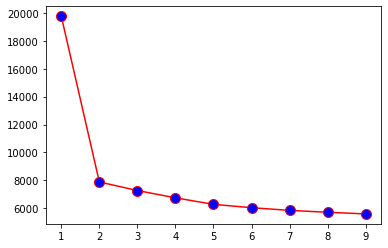

In [30]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,10)),l, c='r', marker='o' , markerfacecolor='blue' , markersize=10)

## <span style=font-family:Times New Roman>Final Model</span>

In [31]:
%reload_ext memory_profiler
model1=KMeans(n_clusters=2,init='k-means++',max_iter=50,n_init=10,random_state=42)
%memit model1.fit(jaccard)
model1.inertia_
y_pred=model1.predict(jaccard)

peak memory: 735.09 MiB, increment: 89.99 MiB


In [32]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [33]:
output={}
for i in np.unique(y_pred):
    output[i]=[]
    for j in range(len(y_pred)):
        if y_pred[j]==i:
            output[i].append(j+1)
print(output)
print("\n")
for i in np.unique(y_pred):
    print(i,":",len(output[i]))

{0: [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 234, 235, 236, 237, 238, 239, 240, 241, 243, 244, 245, 24

In [34]:
from sklearn.decomposition import PCA
Matrix_PCA=PCA(n_components=2)
new=Matrix_PCA.fit_transform(jaccard)
x,y=new[:,0],new[:,1]
cluster_color={0:"orange",1:"blue"}
cluster_names={0:'cluster1',1:'cluster2'}
cluster=model1.labels_.tolist()

In [35]:
jaccard=pd.DataFrame(jaccard)

## <span style=font-family:Times New Roman>Plotting The Clusters</span>

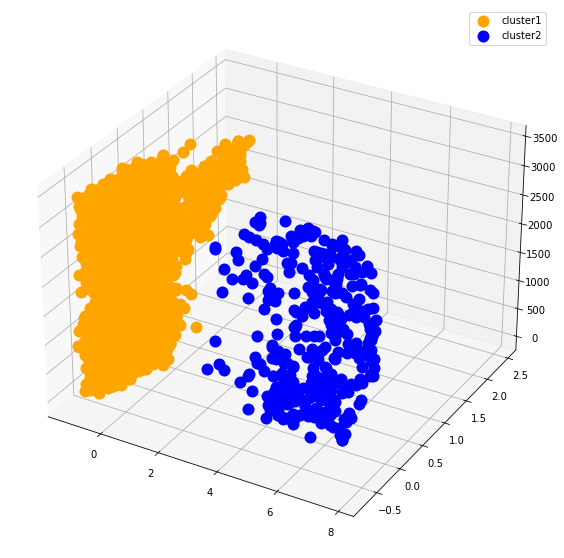

In [36]:
M=pd.DataFrame(dict(x=x,y=y,z=jaccard.columns,label=cluster))
L=M.groupby('label')
plt.figure("KOS",figsize=(20,10))
axis=plt.axes(projection='3d')
axis.margins(0.05)
for name, group in L:
    
    axis.plot(group.x,group.y,group.z, marker='o',linestyle="",ms=12,
                 label=cluster_names[name],color=cluster_color[name],mec='none')
    axis.set_aspect('auto')
    axis.tick_params(\
                     axis='x',
                     which='both',
                     bottom='off',
                     top='off',
                     labelbottom='off')
    axis.tick_params(\
                      axis='y',
                      which='both',
                      bottom='off',
                      top='off',
                      labelbottom='off')
axis.legend(numpoints=1)

In [37]:
end=time.time()
end-start

95.2066822052002

# <span style=font-family:Times New Roman>ENRON Dataset</span>

In [38]:
start=time.time()

In [39]:
enron=pd.read_csv('docword.enron.txt',skiprows=3,sep=' ',header=None)

In [40]:
enron

,0,1,2
0,1,118,1
1,1,285,1
2,1,1229,1
3,1,1688,1
4,1,2068,1
...,...,...,...
3710415,39861,18448,1
3710416,39861,18848,1
3710417,39861,23449,1
3710418,39861,25721,1


Taking sample from data

In [41]:
enron1=enron.groupby([2], group_keys=False).apply(lambda x: x.sample(frac=0.01,random_state=42))

## <span style=font-family:Times New Roman>Creating Sparse Matrix</span>

In [42]:
sparse_matrix=enron1.pivot(index=[0],columns=[1],values=[2])

In [43]:
sparse_matrix=sparse_matrix.fillna(0)

In [44]:
sparse_matrix.columns=list(set(enron1[1]))

In [45]:
sparse_matrix

,4,8,10,17,19,20,25,27,30,34,...,28051,28054,28056,28060,28063,28084,28089,28090,28091,28096
0,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <span style=font-family:Times New Roman>Creating Jaccard Matrix</span>

In [46]:
from sklearn.metrics import pairwise_distances
num = sparse_matrix.to_numpy()
jaccard = 1-pairwise_distances(num, metric = 'jaccard')

C:\Users\anike\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [47]:
jaccard=pd.DataFrame(jaccard)

## <span style=font-family:Times New Roman>Fitting K-means Model To The Data</span>

In [48]:
%reload_ext memory_profiler
from sklearn.cluster import KMeans
l=[]
for i in range(1,10):
    model=KMeans(n_clusters = i,init = 'k-means++',max_iter = 50,n_init = 10)
    %memit model.fit(jaccard)
    l.append(model.inertia_)

peak memory: 7504.84 MiB, increment: 4159.96 MiB
peak memory: 7474.29 MiB, increment: 4158.25 MiB
peak memory: 7473.05 MiB, increment: 4159.03 MiB
peak memory: 7473.34 MiB, increment: 4158.67 MiB
peak memory: 7474.21 MiB, increment: 4158.83 MiB
peak memory: 6991.05 MiB, increment: 4159.22 MiB
peak memory: 6991.88 MiB, increment: 4159.10 MiB
peak memory: 6991.09 MiB, increment: 4159.30 MiB
peak memory: 6993.48 MiB, increment: 4158.24 MiB


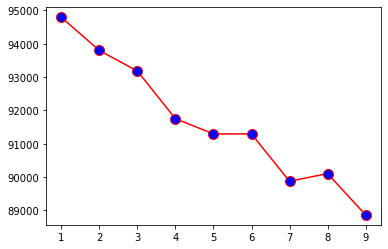

In [49]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,10)),l, c='r', marker='o' , markerfacecolor='blue' , markersize=10)

## <span style=font-family:Times New Roman>Final Model</span>

In [50]:
%reload_ext memory_profiler
model1=KMeans(n_clusters=3,init='k-means++',max_iter=50,n_init=10,random_state=42)
%memit model1.fit(jaccard)
model1.inertia_
y_pred=model1.predict(jaccard)

peak memory: 6995.62 MiB, increment: 4158.50 MiB


In [51]:
output={}
for i in np.unique(y_pred):
    output[i]=[]
    for j in range(len(y_pred)):
        if y_pred[j]==i:
            output[i].append(j+1)
print(output)
print("\n")
for i in np.unique(y_pred):
    print(i,":",len(output[i]))

{0: [1879, 7990], 1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

In [52]:
from sklearn.decomposition import PCA
Matrix_PCA=PCA(n_components=2)
new=Matrix_PCA.fit_transform(jaccard)
x,y=new[:,0],new[:,1]
cluster_color={0:"#FF4040",1:"#7FFF00",2:"#0A0A0A"}
cluster_names={0:'cluster1',1:'cluster2',2:'cluster3'}
cluster=model1.labels_.tolist()

## <span style=font-family:Times New Roman>Plotting The Clusters</span>

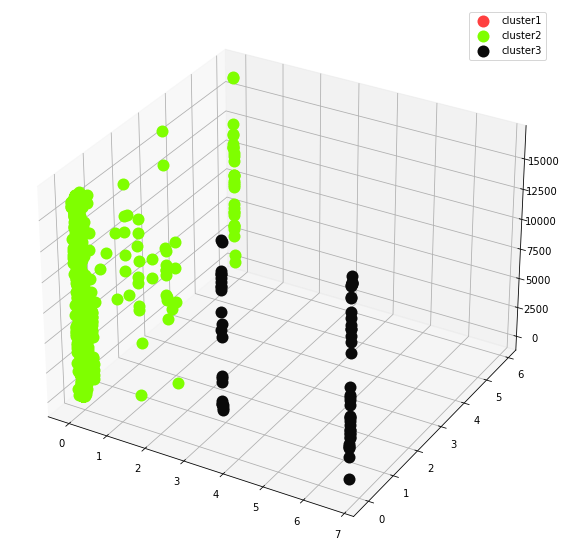

In [53]:
M=pd.DataFrame(dict(x=x,y=y,z=jaccard.columns,label=cluster))
L=M.groupby('label')
plt.figure("ENRON",figsize=(20,10))
axis=plt.axes(projection='3d')
axis.margins(0.05)
for name, group in L:
    
    axis.plot(group.x,group.y,group.z, marker='o',linestyle="",ms=12,
                 label=cluster_names[name],color=cluster_color[name],mec='none')
    axis.set_aspect('auto')
    axis.tick_params(\
                     axis='x',
                     which='both',
                     bottom='off',
                     top='off',
                     labelbottom='off')
    axis.tick_params(\
                      axis='y',
                      which='both',
                      bottom='off',
                      top='off',
                      labelbottom='off')
axis.legend(numpoints=1)

In [54]:
end=time.time()
end-start

2263.5256612300873